## Assignment 9A

The Ising model is a fundamental model in statistical mechanics that describes ferromagnetism using discrete spins arranged on a lattice. Each spin $\sigma_i=\pm1$ interacts with its nearest neighbors, and the system’s energy is given by:
$$E=-J\sum_{\braket{ij}}\sigma_i\sigma_j$$
where $J>0$ corresponds to a ferromagnetic interaction.

As explained in class, at low temperatures, the spins tend to align, leading to spontaneous magnetization. As the temperature increases, thermal fluctuations compete with the interaction energy, eventually destroying long-range order and driving the system into a paramagnetic phase.

In this assignment, we will simulate the Ising model using the Metropolis algorithm, as discussed in Lecture 9.

---

### Problem 1 (100 points)
Write a program to perform a Markov Chain Monte Carlo (MCMC) simulation of the Ising model on a $20\times20$ square lattice. You will need to set up variables to hold the value $\pm1$ of the spin on each lattice site, probably using a two-dimensional integer array, and then take the following steps.

#### Problem 1.A
First write a function to calculate the total energy of the system, as given by the equation above. That is, for a given array of spin values, go through every pair of adjacent spins and add up the contributions $\sigma_i\sigma_j$ from all of them, then multiply by $−J$.

**Hint:** Each unique pair of adjacent spins appears only once in the sum. Thus, there is a term $-J\sigma_1\sigma_2$ if spins 1 and 2 are adjacent to each other, but you do not also need a term $-J\sigma_2\sigma_1$.

In [98]:
import numpy as np

# Energy of the model
def energy_novice(model: np.ndarray, J: float) -> float:
    total_energy = 0.0
    # For all adjacent pairs of spins in the model, calculate the energy contribution
    for i in range(model.shape[0]):
        for j in range(model.shape[1]):
            # Calculate the interaction with the right neighbor
            if j < model.shape[1] - 1:
                total_energy += -J * model[i, j] * model[i, j + 1]
            # Calculate the interaction with the bottom neighbor
            if i < model.shape[0] - 1:
                total_energy += -J * model[i, j] * model[i + 1, j]
    return total_energy

def energy_advanced(model: np.ndarray, J: float) -> float:
    submodel = model[:-1, :]   # Create a submatrix of the model that excludes the last row
    submodel2 = model[1:, :]   # Create a submatrix of the model that excludes the first row
    submodel3 = model[:, :-1]  # Create a submatrix of the model that excludes the last column
    submodel4 = model[:, 1:]   # Create a submatrix of the model that excludes the first column

    # Take the component-wise product of the submatrices and sum them
    row_sum = np.sum(submodel * submodel2) + np.sum(submodel3 * submodel4)
    return -J*row_sum

def energy(model: np.ndarray, J: float) -> float:
    return -J * (np.sum(model[:-1, :] * model[1:, :]) + np.sum(model[:, :-1] * model[:, 1:]))

def normalized_magnetization(model: np.ndarray) -> float:
    return np.sum(model) / model.size


#### Problem 1.B
Implement a Metropolis-style simulation of the Ising model with $J = 1$ and temperature $T = 1$ in units where the Boltzmann constant $k_B$ is also 1.

As explained in Lecture 9, start by initializing the lattice with random spins (e.g., sampling them independently as $\pm1$ with equal probability would result in a total initial magnetization close to zero, as on average half of the spins are up and half are down). At each step of the simulation:
- Select a spin at random.
- Calculate the energy difference ∆E that would result from the flipping of the chosen spin.
- Apply the Metropolis acceptance criterion to determine whether to accept the flip.
- If the move is accepted, update the spin; otherwise, the spin remains unchanged. In both cases, the configuration counts as a step in the Markov Chain.

Repeat this process for a sufficiently large number of Monte Carlo steps. A reasonable choice is
on the order of $10^6$ steps, as used in the example code.

In [99]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 2D array of random spins (1 or -1)
def create_random_model(N: int) -> np.ndarray:
    return np.random.choice([-1, 1], size=(N, N))

# Flip a random spin in the model
def iterate(model: np.ndarray, T: float) -> None:

    # Stored random indices for the model
    k = 1.0  # Boltzmann constant (arbitrary value for this example)
    i = np.random.randint(0, model.shape[0])
    j = np.random.randint(0, model.shape[1])

    # Pre-Flip Energy
    current_energy = energy(model, 1.0)

    # Post-Flip Energy
    model[i,j] *= -1
    new_energy = energy(model, 1.0)

    # Calculate the metropolis acceptance probability
    delta_energy = new_energy - current_energy
    p_accept = min(1, np.exp(-delta_energy / (k * T)))

    # Accept or reject the flip based on the acceptance probability
    if np.random.rand() < p_accept:
        pass              # Accept the flip
    else:
        model[i,j] *= -1  # Revert the flip

#### Problem 1.C
Make a plot of the total magnetization:
$$M=\sum_i\sigma_i$$
as a function of the number of Metropolis algorithm steps. If everything is done correctly, you should see that during the initial steps the magnetization fluctuates unpredictably before settling into equilibrium fluctuations around a well-defined value.

Text(0.5, 0, 'Iteration')

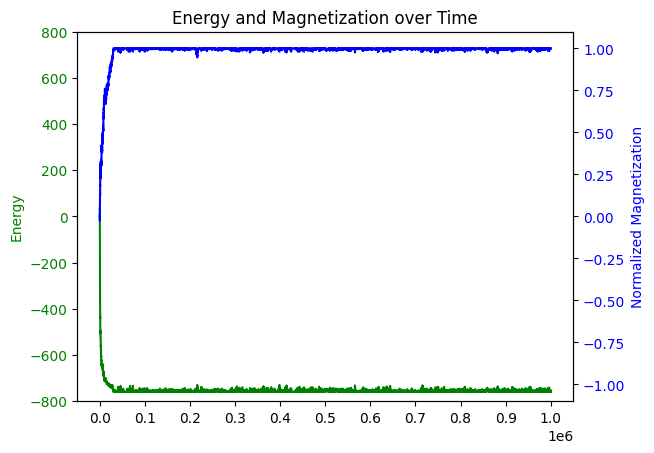

In [110]:
# Program
STEPS = 1_000_000  # Number of steps to iterate
T = 1.0  # Temperature (arbitrary value for this example)
J = 1.0  # Interaction strength (arbitrary value for this example)
N = 20   # Size of the model
model = create_random_model(N)
model_energy = [energy(model, J)]
model_magnetization = [normalized_magnetization(model)]
for i in range(STEPS):
    iterate(model, T)
    model_energy.append(energy(model, J))
    model_magnetization.append(normalized_magnetization(model))

# Plot the results with 2 axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Energy plot
ax1.plot(model_energy, 'g-')
ax1.set_ylabel('Energy', color='g')
ax1.tick_params(axis='y', labelcolor='g')
ax1.set_ylim(-2*N**2, 2*N**2)

# Magnetization plot
ax2.plot(model_magnetization, 'b-')
ax2.set_ylabel('Normalized Magnetization', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_ylim(-1.1, 1.1)

# Final plot settings
plt.xticks(np.arange(0, len(model_energy), step=int(STEPS/10)), rotation=45)
plt.title('Energy and Magnetization over Time')
plt.xlabel('Iteration')

#### Problem 1.D
Run your program again, but this time set the temperature to $T = 2.5$, where the system is expected to be in the paramagnetic phase.

AttributeError: 'Figure' object has no attribute 'xticks'

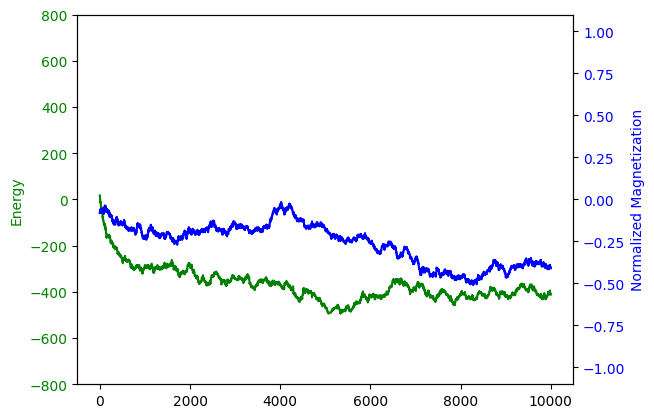

In [ ]:
# Program
STEPS = 1_0_000  # Number of steps to iterate
T = 2.5  # Temperature (arbitrary value for this example)
J = 1.0  # Interaction strength (arbitrary value for this example)
N = 20   # Size of the model
model = create_random_model(N)
model_energy = [energy(model, J)]
model_magnetization = [normalized_magnetization(model)]
for i in range(STEPS):
    iterate(model, T)
    model_energy.append(energy(model, J))
    model_magnetization.append(normalized_magnetization(model))

# Plot the results with 2 axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Energy plot
ax1.plot(model_energy, 'g-')
ax1.set_ylabel('Energy', color='g')
ax1.tick_params(axis='y', labelcolor='g')
ax1.set_ylim(-2*N**2, 2*N**2)

# Magnetization plot
ax2.plot(model_magnetization, 'b-')
ax2.set_ylabel('Normalized Magnetization', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_ylim(-1.1, 1.1)

# Final plot settings from the above figure
plt.xticks(np.arange(0, len(model_energy), step=int(STEPS/10)), rotation=45)
plt.title('Energy and Magnetization over Time')
plt.xlabel('Iteration')